In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA


# Import the Data

In [205]:
file = 'datasets\creditcard\default_of_credit_card_clients.csv'

#df = pd.read_csv(file, header=1, sep=',')
df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls', header=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Debido a que la ultima columna (targets), es demasiado larga, procederemos a cambiarle el nombre a 'DEFAULT'.

In [206]:
df.rename({'default payment next month': 'DEFAULT'}, axis='columns', inplace=True)
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

La columna 'ID' no proporciona ningun tipo de informacion valiosa, por lo que procederemos a quitarla

In [207]:
df.drop('ID', axis=1, inplace=True)
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

# MISSING DATA

### IDENTIFY MISSING DATA

In [208]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_0      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

Vamos a ir paso a paso, por lo que analizaremos cada una de las columnas de la base de datos para identificar si son o no utiles.

In [210]:
print(df['SEX'].unique())
print(df['SEX'].value_counts())

[2 1]
2    18112
1    11888
Name: SEX, dtype: int64


La edad si esta acorde a lo esperado.

In [211]:
print(df['EDUCATION'].unique())
print(df['EDUCATION'].value_counts())

[2 1 3 5 4 6 0]
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64


Podemos observar que en la educacion se encuentra valores de 0-6, por lo general la educacion va de 1-4. Por lo que 0, 5 y 6 son categorias no deseadas.

In [212]:
print(df['MARRIAGE'].unique())
print(df['MARRIAGE'].value_counts())

[1 2 3 0]
2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64


Igualmente, la variable 'MARRIAGE' contiene un valor no deseado el cual es el 0.

In [213]:
len(df.loc[df['AGE'] == 0])

0

La edad esta acorde a lo esperado, ya que no se tiene ninguno dato en 0. Si hubiera se concideraria que es un dato perdido.

### DEALING WITH MISSING DATA

Ahora, debemos lidiar con los datos perdidos, por lo que, contaremos cuantos de estos existen en la base de datos.

In [214]:
len(df.loc[(df['EDUCATION'] == 0) | (df['MARRIAGE'] == 0)])

68

Tenemos 68 valores perdidos. Teniendo en cuenta que la base de datos cuenta con 30000 datos para cada columna, se podrian considerar que esto es menos del 0,5%.

In [215]:
df_no_missing = df.loc[(df['EDUCATION'] != 0) & (df['MARRIAGE'] != 0)]
len(df_no_missing)

29932

Ahora, observamos que nos deshicimos de los datos perdidos, por lo que ahora podremos trabajar con esta base de datos. A pesar que, en la columna de 'EDUCATION', aun se tengan datos no esperados (5 y 6).

# DOWNSAMPLE THE DATA

Support Vector Machine es increible con base de datos pequenas, a pesar que esta base de datos no se considere muy grande, es lo suficiente para ocasionar que se tome un tiempo en optimizar mediante Cross Valitation.

Por lo que, reduciremos la base de datos de las dos categorias (DEFAULT & NO DEFAULT), cada una con 1000 datos.

In [216]:
df_default = df_no_missing[df_no_missing['DEFAULT']==1]
df_no_default = df_no_missing[df_no_missing['DEFAULT']==0]

In [217]:
print("DEFAULT: ", df_default.shape)
print("NO DEFAULT: ", df_no_default.shape)

DEFAULT:  (6631, 24)
NO DEFAULT:  (23301, 24)


In [218]:
df_no_default_downsampled = resample(df_no_default,
                                    replace=False,
                                    n_samples=1000,
                                    random_state=42)

len(df_no_default_downsampled)                                   

1000

In [219]:
df_default_downsampled = resample(df_default,
                                    replace=False,
                                    n_samples=1000,
                                    random_state=42)

len(df_default_downsampled)   

1000

Ahora, nuevamente vamos a unir las los bases de datos. Este proceso de separacion se realiza, debido a que, se quiere mantener un muestreo estratificado (Stratified sampling), esto quiere decir que no se pierdan subgrupos representativos de la base de datos.

Si tomaramos la base de datos completa y realizamos el mismo proceso con el fin de tener 1000 datos, se podria tener perdida de datos representativos, por lo que, la base de datos seria una totalmente diferente.

In [220]:
df_downsample = pd.concat([df_no_default_downsampled, df_default_downsampled])
df_downsample

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
641,130000,2,3,1,28,0,0,0,0,-2,...,0,0,0,2500,1000,0,0,0,0,0
4678,170000,1,3,1,29,0,0,0,0,0,...,35234,32869,33862,7200,7500,1200,1200,1500,1300,0
16004,180000,2,2,1,29,0,0,0,0,0,...,26662,26166,26176,1800,1800,1500,1056,950,1000,0
22974,210000,2,2,2,32,-2,-2,-2,-2,-2,...,0,0,0,979,412,0,0,0,0,0
17535,190000,2,3,1,45,0,0,0,0,0,...,81778,83082,84811,3300,3331,3359,2663,2751,3000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6154,30000,2,1,2,34,1,2,2,2,2,...,25624,25977,25413,1396,0,1967,903,0,1100,1
14072,320000,1,1,1,43,-1,0,0,0,0,...,31851,3105,-45,10000,5000,0,0,0,0,1
5387,50000,1,2,2,23,-1,-1,0,0,-1,...,11804,1420,0,15000,20300,9500,1420,0,0,1
23192,150000,2,3,1,43,0,0,0,0,0,...,22013,22449,22922,1973,1353,1366,802,833,837,1


# SPLIT DATA / DEPENDENT AND INDEPENDENT VARIABLES

In [221]:
X = df_downsample.drop('DEFAULT', axis=1).copy()
y = df_downsample['DEFAULT'].copy()

### ONE-HOT ENCODING

Aca vamos a ver diferentes formas de transformar los datos mediante One Hot Encoding, cabe aclarar que tanto el OneHotEncoder de sklearn elimina el nombre de las columnas, asi como el ColumnTransformer. Ademas, OneHotEncoder elimina el resto de las columnas, por lo que se usa ColumnTransformer para que se realice el proceso solo en la columna de 'MARRIAGE', sin afectar a las otras columnas.

In [222]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse=False)

X_one_hot_encoder = one_hot_encoder.fit_transform(X[['MARRIAGE']])
X_one_hot_encoder.shape

(2000, 3)

In [223]:
from sklearn.compose import ColumnTransformer

# La variable remainder tiene dos opciones: drop y passthrough. La primera elimina las demas columnas como hace OneHotEncoder
# y la segunda deja las demas columnas, sin eliminarlas.
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), ['MARRIAGE'])], remainder='passthrough', verbose=True)
X_columnTransformer = columnTransformer.fit_transform(X)
X_columnTransformer.shape

[ColumnTransformer] ....... (1 of 2) Processing encoder, total=   0.0s
[ColumnTransformer] ..... (2 of 2) Processing remainder, total=   0.0s


(2000, 25)

In [224]:
pd.get_dummies(X, columns=['PAY_6'])

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT6,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
641,130000,2,3,1,28,0,0,0,0,-2,...,0,1,0,0,0,0,0,0,0,0
4678,170000,1,3,1,29,0,0,0,0,0,...,1300,0,0,1,0,0,0,0,0,0
16004,180000,2,2,1,29,0,0,0,0,0,...,1000,0,0,1,0,0,0,0,0,0
22974,210000,2,2,2,32,-2,-2,-2,-2,-2,...,0,1,0,0,0,0,0,0,0,0
17535,190000,2,3,1,45,0,0,0,0,0,...,3000,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6154,30000,2,1,2,34,1,2,2,2,2,...,1100,0,0,0,1,0,0,0,0,0
14072,320000,1,1,1,43,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5387,50000,1,2,2,23,-1,-1,0,0,-1,...,0,0,1,0,0,0,0,0,0,0
23192,150000,2,3,1,43,0,0,0,0,0,...,837,0,0,1,0,0,0,0,0,0


La que vimos las diferencias de cada uno, para este tutorial y practica utilizaremos get_dummies para mayor facilidad para el transformador.

In [225]:
X_encoded = pd.get_dummies(X, columns=[ 'SEX',
                                        'EDUCATION',
                                        'MARRIAGE',
                                        'PAY_0',
                                        'PAY_2',
                                        'PAY_3',
                                        'PAY_4',
                                        'PAY_5',
                                        'PAY_6'])

X_encoded.head()                           

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
641,130000,28,100143,50456,50000,0,0,0,2500,1000,...,0,1,0,0,0,0,0,0,0,0
4678,170000,29,165027,168990,172307,35234,32869,33862,7200,7500,...,0,0,0,1,0,0,0,0,0,0
16004,180000,29,25781,26000,26310,26662,26166,26176,1800,1800,...,0,0,0,1,0,0,0,0,0,0
22974,210000,32,355,975,410,0,0,0,979,412,...,0,1,0,0,0,0,0,0,0,0
17535,190000,45,76433,78472,80548,81778,83082,84811,3300,3331,...,0,0,0,1,0,0,0,0,0,0


# CENTERING AND SCALING

RBF supone que los datos estan centrados y escalados, por lo que necesitamos realizar este procedimiento antes de implementar el SVM.

Antes de ellos, repartimos los datos de testeo y entrenamiento para evitar Data Leakage, ya que, esto ocurre cuando la informacion de la base de entrenamiento afecta a la base de datos de testeo.

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

# PRELIMINARAY SVM

In [227]:
clf_svm = SVC(random_state=42, kernel="rbf")
clf_svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

Vamos a graficar la matriz de confusion.

C:\Users\nicol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


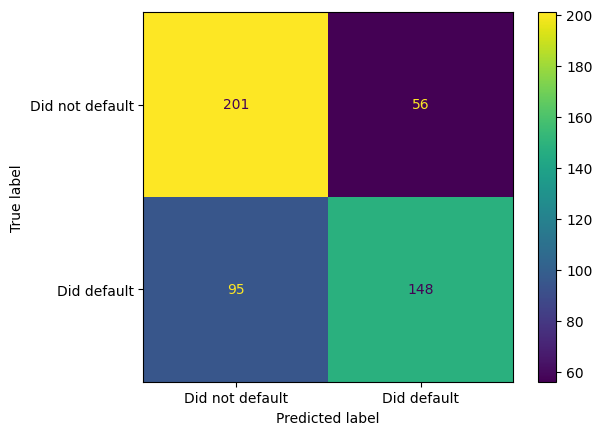

In [228]:
plot_confusion_matrix(clf_svm,
                    X_test_scaled,
                    y_test,
                    values_format='d',
                    display_labels=['Did not default', 'Did default']) # type: ignore

### ANALISIS 1

Lo que podemos analizar de esta matriz de confusion, es que:
Vemos de 257 personas que NO tienen DEFAULT, 201 fueron correctamente clasificadas (78.2%), mientras que 243 personas que SI tienen DEFAULT, 148 fueron correctamente clasificadas (61%). Por lo que SVM no fue demasiado increible.

# OPTIMIZE PARAMETERS WITH CROSS VALIDATION AND GRIDSEARCHCV()

Para el caso de usar el kernal RBF, necesitaremos varias las constantes de gamma y la variable de regularizacion C, mediante la funcion de GridSearchCV(), vamos a buscar cuales son los mejores valores para estos dos parametros.

In [229]:
param_grid = [
    {'C': [1, 10, 100, 105, 110],
    'gamma': ['scale', 0.0005, 0.001, 0.005, 0.01, 0.1],
    'kernel': ['rbf'],}]

optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=5, #Se tiene 5*5*5=150 diferentes combinaciones.
    scoring='accuracy',
    verbose=2,
)

In [230]:
optimal_params.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.0005, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.0005, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.0005, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.0005, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.0005, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.00

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 105, 110],
                          'gamma': ['scale', 0.0005, 0.001, 0.005, 0.01, 0.1],
                          'kernel': ['rbf']}],
             scoring='accuracy', verbose=2)

In [231]:
optimal_params.best_params_

{'C': 105, 'gamma': 0.001, 'kernel': 'rbf'}

In [232]:
optimal_params.best_score_

0.7053333333333333

Despues de varias iteraciones y pruebas, se puede evidenciar que los mejores parametros para C y gamma son los dados anteriormente, por lo que ahora asignaremos estos valores a los parametros de SVM.

In [233]:
C_best = optimal_params.best_params_.get('C')
gamma_best = optimal_params.best_params_.get('gamma')

In [234]:
clf_svm = SVC(kernel="rbf", gamma=gamma_best, C=C_best, random_state=42)
clf_svm.fit(X_train_scaled, y_train)

SVC(C=105, gamma=0.001, random_state=42)

C:\Users\nicol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


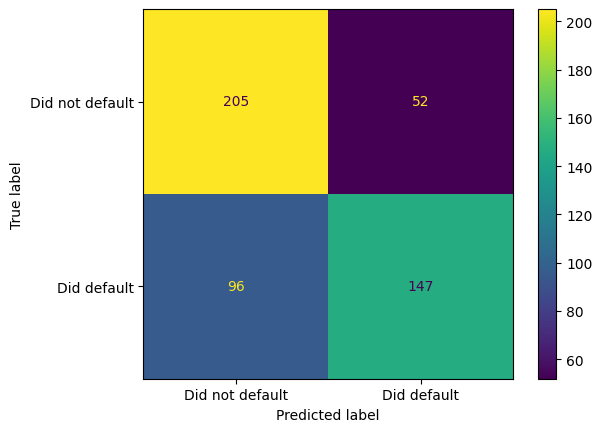

In [235]:
plot_confusion_matrix(clf_svm,
                    X_test_scaled,
                    y_test,
                    values_format='d',
                    display_labels=['Did not default', 'Did default']) # type: ignore

### ANALISIS 2

Ahora, analizando esta nueva matriz de confusion de tiene que:
257 personas que NO tienen DEFAULT, 205 fueron correctamente clasificadas (79.8%), mientras que 243 personas que SI tienen DEFAULT, 147 fueron correctamente clasificadas (60.5%). Por lo que el nuevo SVM es un poco mejor, sin embargo no es mucha la diferencia.